![penguins]("penguins.png")

# Regression 

Goals:
* Look at a 1D linear regression with scikit-learn
* Extend to linear regression with several inputs
* Convert this simple linear regression problem to PyTorch

In [60]:
import pandas as pd
import torch
import matplotlib.pyplot as plt

Load the penguin dataset (a CSV file) using the `pnadas` module

In [61]:
input_penguins_df = pd.read_csv("../Downloads/penguins.csv")

Since some of the entries don't exist in the dataset, we drop them using the following line

In [62]:
penguins_df = input_penguins_df.dropna(inplace=False)

## Simple Linear Regression

We will start by extracting only two fields, and using one as an input to regress the other: simple linear regression

In [ ]:
data = penguins_df[["flipper_length_mm","body_mass_g"]].values

Plotting the data shows that linear regression should be modelling the relationship between these two variables

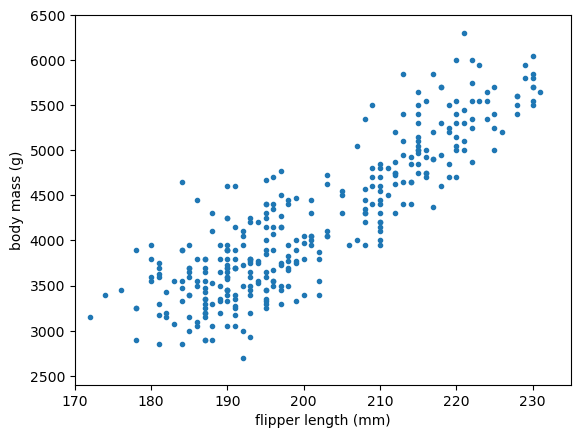

In [26]:
fig, ax = plt.subplots()

def plot_regression_problem(ax, xlow=170, xhigh=235, ylow=2400, yhigh=6500):
    ax.scatter(data[:,0], data[:,1], marker=".")
    ax.set_xlim(xlow, xhigh)
    ax.set_ylim(ylow, yhigh)
    ax.set_xlabel("flipper length (mm)")
    ax.set_ylabel("body mass (g)")

plot_regression_problem(ax)

plt.show()

We begin by using the `LinearRegression` model from `scikit-learn` which solves the problem analytically, defining in this simple case a straight line through the data as found by ordinary least squares (so you could also use the `linalg.lstqs` method from `scipy`)

In [34]:
from sklearn.linear_model import LinearRegression

Let's call the input `X` and target `y`. We need to reshape `X` into a column vector, and then we create the linear regressio model, and perform the fit. Pretty simple...

In [44]:
X = data[:, 1].reshape(-1, 1)  # Independent variable (input)
y = data[:, 2]  # Dependent variable (target)

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X, y)

LinearRegression()

We can then use the regressed model to make predictions given some input

(Later in deep learning contexts we will want to test a model on different input data to the inputs which defined the model, but that doesn't matter here)

In [ ]:
# Use the model to make predictions
y_pred = model.predict(X)

Plotting the regressed relationship and printing the parameters of that relationship

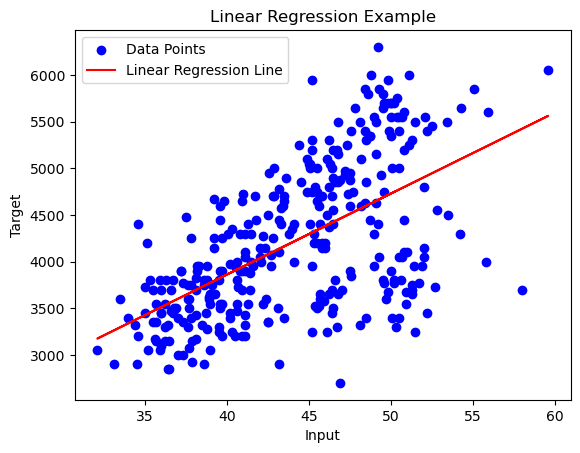

Slope (coefficient): 86.7917596475555
Intercept: 388.8451587602731


In [45]:
# Plot the original data and the linear regression line
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X, y_pred, color='red', label='Linear Regression Line')
plt.xlabel('Input')
plt.ylabel('Target')
plt.title('Linear Regression Example')
plt.legend()
plt.show()

# Print out the model parameters (slope and intercept)
print(f"Slope (coefficient): {model.coef_[0]}")
print(f"Intercept: {model.intercept_}")

Finally, it's important to find a metric to quantify the "goodness of fit". Many metrics are available; there's no one best choice...

Scikit-learn by default uses something called the *coefficient of determination* which is 0 for a useless model and 1 for a perfect fit

In [52]:
# Evaluate the model (R-squared score)
r_squared = model.score(X, y)
print(f"R-squared: {r_squared}")

R-squared: 0.7627425336380345


## Multiple Linear Regression

The extension to multiple inputs is simple: load additional columns from `penguin_df` and define input `X` to contain those additional columns. Note that it becomes hard to visualise because for N-inputs the relationship is an N-dimensional hyperplane, so it's only a simple curve in 2D for one input...

In [58]:


# Split data into inputs (X) and target (y)
X = data[:, :1]  # Inputs: first and second columns
y = data[:, 2]   # Target: third column

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Use the model to make predictions
y_pred = model.predict(X)

# Plot the data and the predicted values (for visualization, we can only plot 2D projections)
# Since we have 2 input features, we can show a projection of the data in a 3D space or a pair of 2D plots.

# Print out the model parameters (coefficients and intercept)
print(f"Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_}")



Coefficients: [50.15326594]
Intercept: -5872.0926828428355


In [66]:
print(model.score(X,y))

0.7620921573403914


## Regression in PyTorch

Repeating the procedure in PyTorch will be instructive for building neural networks in PyTorch later

In [272]:
import torch
from torch import nn, optim

For PyTorch, we need to load the data into tensors, luckily we're familiar with these already. They need to be columns hence the reshaping

In [273]:
input_data = torch.tensor(penguins_df["flipper_length_mm"].values, dtype=torch.float32).reshape(-1,1)
target     = torch.tensor(penguins_df["body_mass_g"].values,       dtype=torch.float32).reshape(-1,1)

Our model here is a "linear" layer which for the simple linear regression case, will map a single value $X_i$ to a single value $y_i$

In [274]:
model = nn.Linear(1, 1)

We can examine the model through the following. It shows we've defined a Linear model with one input, one output, and biases turned on (which is just the y-intercept for simple linear regression). The model parameters are the things which will alter as we train - just now they're set to random values

In [275]:
print(model)
print(list(model.parameters()))

Linear(in_features=1, out_features=1, bias=True)
[Parameter containing:
tensor([[0.1961]], requires_grad=True), Parameter containing:
tensor([0.9502], requires_grad=True)]


Unlike the scikit-learn case where it used an analytic solution for ordinary least squares to solve the regression problem, in PyTorch we need to do this iteratively, minimising some loss function. We will use MSELoss which is a very common choice for regression problems

In [276]:
loss_function = nn.MSELoss()
optimizer = optim.Rprop(model.parameters())

Now the iteration itself, a for loop which:
* Makes a prediction based on the current model
* Computes the loss ~ the difference between the prediction and the true value
* Updates the model 

In [343]:
# keep track of the loss every epoch. This is only for visualisation
losses = []

N_epochs = 2000

for epoch in range(N_epochs):
    # tell the optimizer to begin an optimization step
    optimizer.zero_grad()

    # use the model as a prediction function: features → prediction
    predictions = model(input_data)

    # compute the loss (χ²) between these predictions and the intended targets
    loss = loss_function(predictions, target)

    # tell the loss function and optimizer to end an optimization step
    loss.backward()
    optimizer.step()
    
    losses.append(loss.item())
    
    # Print the loss every 10 epochs
    if (epoch + 1) % 1 == 0:
        print(f'Epoch [{epoch + 1}/{N_epochs}], Loss: {loss.item():.4f}')

Epoch [1/2000], Loss: 19437444.0000
Epoch [2/2000], Loss: 19419746.0000
Epoch [3/2000], Loss: 19398520.0000
Epoch [4/2000], Loss: 19373060.0000
Epoch [5/2000], Loss: 19342532.0000
Epoch [6/2000], Loss: 19305934.0000
Epoch [7/2000], Loss: 19262058.0000
Epoch [8/2000], Loss: 19209476.0000
Epoch [9/2000], Loss: 19146476.0000
Epoch [10/2000], Loss: 19071014.0000
Epoch [11/2000], Loss: 18980658.0000
Epoch [12/2000], Loss: 18872520.0000
Epoch [13/2000], Loss: 18743170.0000
Epoch [14/2000], Loss: 18588546.0000
Epoch [15/2000], Loss: 18403856.0000
Epoch [16/2000], Loss: 18183470.0000
Epoch [17/2000], Loss: 17920788.0000
Epoch [18/2000], Loss: 17608142.0000
Epoch [19/2000], Loss: 17236660.0000
Epoch [20/2000], Loss: 16796210.0000
Epoch [21/2000], Loss: 16275341.0000
Epoch [22/2000], Loss: 15661342.0000
Epoch [23/2000], Loss: 14940444.0000
Epoch [24/2000], Loss: 14098271.0000
Epoch [25/2000], Loss: 13120638.0000
Epoch [26/2000], Loss: 11994967.0000
Epoch [27/2000], Loss: 10712545.0000
Epoch [28/

We've printed the loss every 10 epochs to keep track that it is decreasing as we want.
This is good practice for training ML models, rather than just waiting until all epochs have run and then examining the result.
There are also many highly advanced tools for monitoring training: wandb.ai and TensorBoard are a couple of examples

The loss curve is one of the most useful plots in all of machine learning. Use this simple function

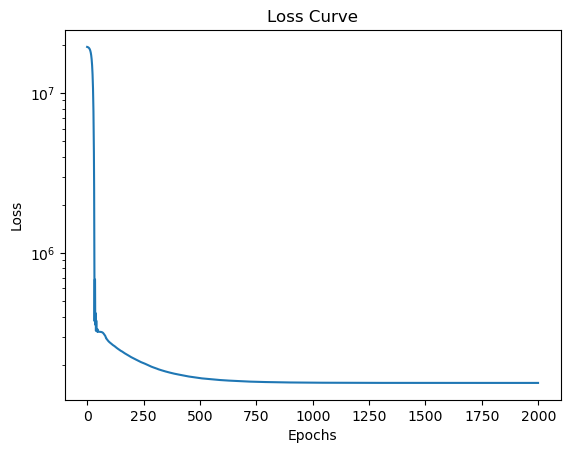

In [344]:
def plot_loss_curve(losses):
    plt.plot(losses)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.yscale('log')
    plt.title('Loss Curve')
    plt.show()
    
plot_loss_curve(losses)

In [342]:
model.reset_parameters()
optimizer = optim.Rprop(model.parameters())

In [337]:
list(model.parameters())

[Parameter containing:
 tensor([[47.8680]], requires_grad=True),
 Parameter containing:
 tensor([-5410.0718], requires_grad=True)]

## Evaluating the model

Evaluating the model on the input data is as simple as a passing it as an argument. This returns a tensor with the derivates attached, so we have to detach these and map back to numpy

In [345]:
y_out = model(input_data)
y_pred = y_out.detach()

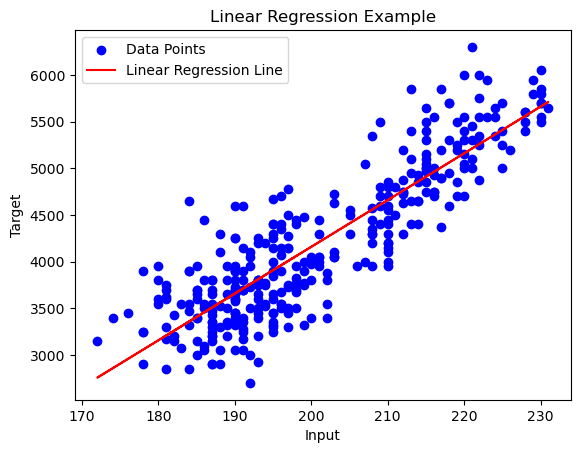

In [346]:
# Plot the original data and the linear regression line
plt.scatter(input_data, target, color='blue', label='Data Points')
plt.plot(input_data, y_pred, color='red', label='Linear Regression Line')
plt.xlabel('Input')
plt.ylabel('Target')
plt.title('Linear Regression Example')
plt.legend()
plt.show()

# Multilinear Regression in PyTorch

In [354]:
input_data = torch.tensor(penguins_df[["flipper_length_mm" , "bill_depth_mm"]].values, dtype=torch.float32)
target     = torch.tensor(penguins_df["body_mass_g"].values,       dtype=torch.float32).reshape(-1,1)

In [355]:
model2 = nn.Linear(2, 1)

In [356]:
loss_function = nn.MSELoss()
optimizer = optim.Rprop(model2.parameters())

In [357]:
# keep track of the loss every epoch. This is only for visualisation
losses = []

N_epochs = 3000

for epoch in range(N_epochs):
    # tell the optimizer to begin an optimization step
    optimizer.zero_grad()

    # use the model as a prediction function: features → prediction
    predictions = model2(input_data)

    # compute the loss (χ²) between these predictions and the intended targets
    loss = loss_function(predictions, target)

    # tell the loss function and optimizer to end an optimization step
    loss.backward()
    optimizer.step()
    
    losses.append(loss.item())
    
    # Print the loss every 10 epochs
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch + 1}/{N_epochs}], Loss: {loss.item():.4f}')

Epoch [10/3000], Loss: 18780596.0000
Epoch [20/3000], Loss: 16343205.0000
Epoch [30/3000], Loss: 5101005.0000
Epoch [40/3000], Loss: 384653.0938
Epoch [50/3000], Loss: 355016.3125
Epoch [60/3000], Loss: 341965.9062
Epoch [70/3000], Loss: 313964.7188
Epoch [80/3000], Loss: 279006.7188
Epoch [90/3000], Loss: 262194.8125
Epoch [100/3000], Loss: 248491.7188
Epoch [110/3000], Loss: 238798.2500
Epoch [120/3000], Loss: 231720.0469
Epoch [130/3000], Loss: 227653.4844
Epoch [140/3000], Loss: 225221.6875
Epoch [150/3000], Loss: 223560.4531
Epoch [160/3000], Loss: 222417.9531
Epoch [170/3000], Loss: 221435.3594
Epoch [180/3000], Loss: 220917.8125
Epoch [190/3000], Loss: 220507.3125
Epoch [200/3000], Loss: 220010.8125
Epoch [210/3000], Loss: 218391.0625
Epoch [220/3000], Loss: 214257.2031
Epoch [230/3000], Loss: 212830.4688
Epoch [240/3000], Loss: 211667.7656
Epoch [250/3000], Loss: 210862.4844
Epoch [260/3000], Loss: 210510.3438
Epoch [270/3000], Loss: 210140.4375
Epoch [280/3000], Loss: 209573.3

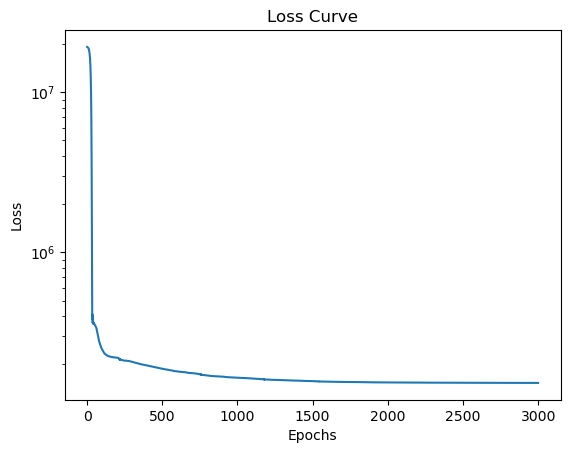

In [358]:
plot_loss_curve(losses)

In [360]:
y_out = model2(input_data)
y_pred = y_out.detach()

In [361]:
# Compute the total sum of squares (SST)
mean_target = torch.mean(target)
sst = torch.sum((target - mean_target) ** 2)

# Compute the residual sum of squares (SSE)
sse = torch.sum((target - predictions) ** 2)

# Compute R-squared
r2 = 1 - sse / sst
print(f'R-squared: {r2.item()}')


R-squared: 0.7634010910987854


# Bonus

As a bonus, to evalulate the various models' performances, can you implement the coefficient of determination as a function which takes torch tensors and returns the coeffient?

In [362]:
def coef_of_determination(y_true, y_pred):
    ...
    return 